In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("cepea_dados_3.csv")


print("=== Estatísticas Descritivas ===")
print(df[['preco', 'quantidade']].describe())

print("\n=== Mediana ===")
print(df[['preco', 'quantidade']].median())

print("\n=== Desvio Padrão ===")
print(df[['preco', 'quantidade']].std())

=== Estatísticas Descritivas ===
              preco     quantidade
count   7310.000000    7310.000000
mean     499.851209    6095.884542
std      892.990307    9221.041903
min      -99.330000    -942.000000
25%       65.202500    1224.000000
50%       99.765000    3259.500000
75%      313.182500    6354.750000
max    14279.580000  165294.000000

=== Mediana ===
preco           99.765
quantidade    3259.500
dtype: float64

=== Desvio Padrão ===
preco          892.990307
quantidade    9221.041903
dtype: float64


In [2]:
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

outliers_preco = detectar_outliers(df, 'preco')
outliers_quantidade = detectar_outliers(df, 'quantidade')

print(f"\nOutliers em preço: {len(outliers_preco)} registros")
print(outliers_preco[['commodity', 'preco', 'quantidade']])

print(f"\nOutliers em quantidade: {len(outliers_quantidade)} registros")
print(outliers_quantidade[['commodity', 'preco', 'quantidade']])



Outliers em preço: 1473 registros
     commodity     preco  quantidade
17     ALGODÃO  13381.29      4955.0
82     ALGODÃO   6302.34     26625.0
89     ALGODÃO  14279.58      -260.0
103    ALGODÃO   9938.21      4415.0
137    ALGODÃO   5366.19     20186.0
...        ...       ...         ...
3650     TRIGO   1282.89      4646.0
3651     TRIGO   1273.43      3569.0
3652     TRIGO   1291.38      1980.0
3653     TRIGO   1284.30      1181.0
3654     TRIGO   1293.23      4551.0

[1473 rows x 3 columns]

Outliers em quantidade: 662 registros
           commodity    preco  quantidade
49           ALGODÃO   -75.70    165294.0
72           ALGODÃO   259.77     38967.0
82           ALGODÃO  6302.34     26625.0
134          ALGODÃO   -99.33     16059.0
137          ALGODÃO  5366.19     20186.0
...              ...      ...         ...
5112  CANA-DE-AÇÚCAR     0.88     48667.0
5113  CANA-DE-AÇÚCAR     0.88     18062.0
5114  CANA-DE-AÇÚCAR     0.89     45353.0
5115  CANA-DE-AÇÚCAR     0.87     397

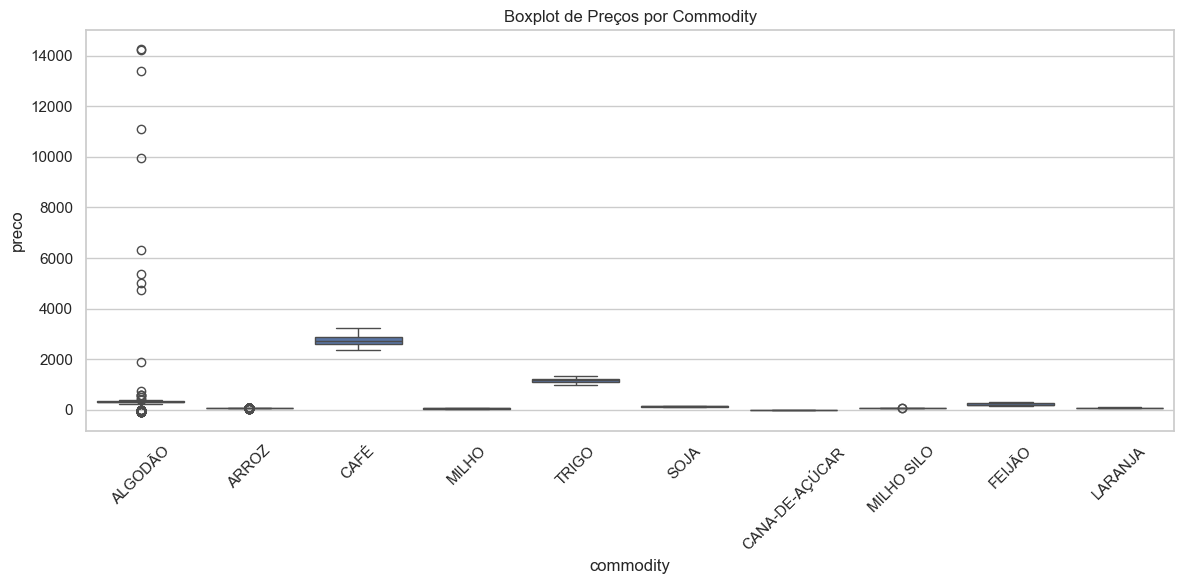

In [4]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.boxplot(x="commodity", y="preco", data=df)
plt.title("Boxplot de Preços por Commodity")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

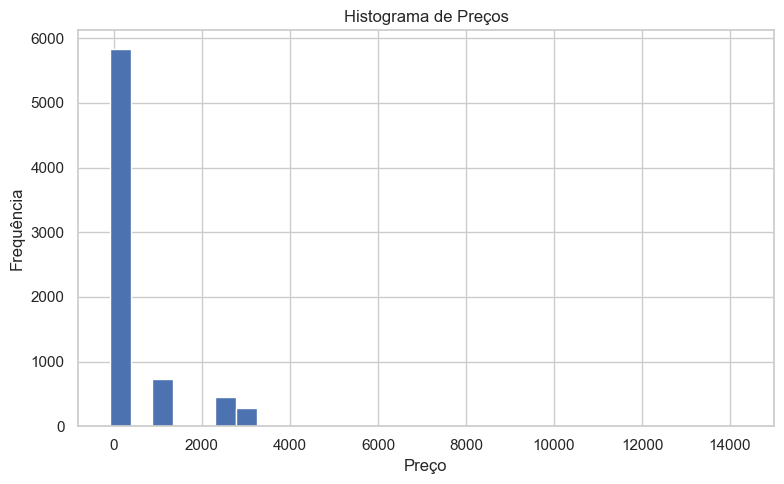

In [5]:
plt.figure(figsize=(8, 5))
df['preco'].hist(bins=30)
plt.title("Histograma de Preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


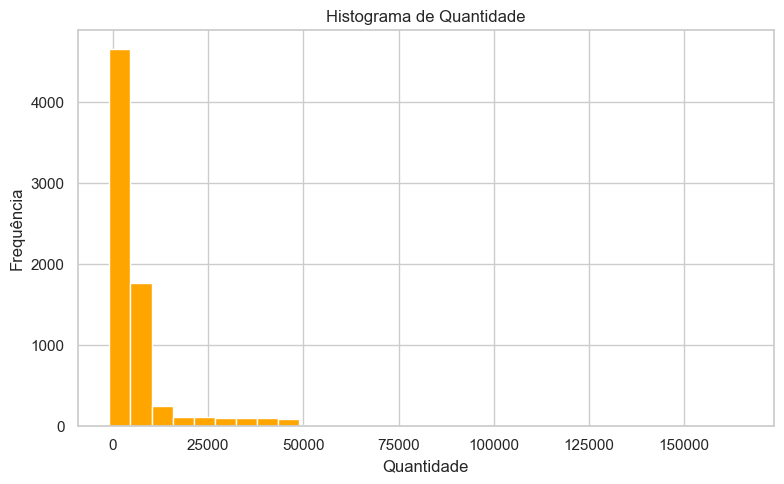

In [6]:
plt.figure(figsize=(8, 5))
df['quantidade'].hist(bins=30, color="orange")
plt.title("Histograma de Quantidade")
plt.xlabel("Quantidade")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()

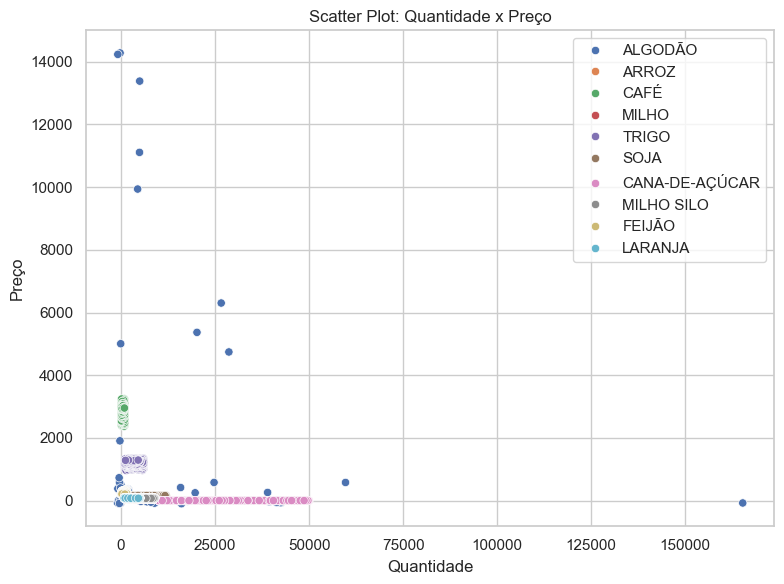

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="quantidade", y="preco", hue="commodity", data=df)
plt.title("Scatter Plot: Quantidade x Preço")
plt.xlabel("Quantidade")
plt.ylabel("Preço")
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()